In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
def f_example_1(x):
    return np.exp(x) - np.log(x)

def dfdx_example_1(x):
    return np.exp(x) - 1/x

def d2fdx2_example_1(x):
    return np.exp(x) + 1/(x**2)

x_0 = 1.6
print(f"f({x_0}) = {f_example_1(x_0)}")
print(f"f'({x_0}) = {dfdx_example_1(x_0)}")
print(f"f''({x_0}) = {d2fdx2_example_1(x_0)}")

f(1.6) = 4.483028795149379
f'(1.6) = 4.328032424395115
f''(1.6) = 5.343657424395115


(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='$x$', ylabel='$f,(x)$'>)

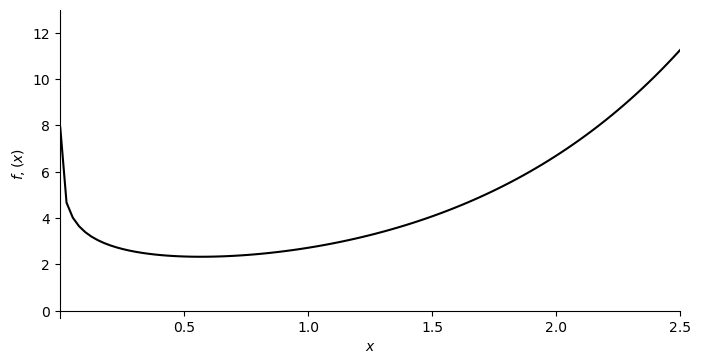

In [4]:
def plot_f(x_range, y_range, f, ox_position):
    x = np.linspace(*x_range, 100)
    fig, ax = plt.subplots(1,1,figsize=(8,4))

    ax.set_ylim(*y_range)
    ax.set_xlim(*x_range)
    ax.set_ylabel('$f,(x)$')
    ax.set_xlabel('$x$')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position(('data', ox_position))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.autoscale(enable=False)
    
    pf = ax.plot(x, f(x), 'k')
    
    return fig, ax

plot_f([0.001, 2.5], [-0.3, 13], f_example_1, 0.0)

In [5]:
def newtons_method(dfdx, d2fdx2, x, num_iterations=100):
    for iteration in range(num_iterations):
        x = x - dfdx(x)/d2fdx2(x)
        print(x)
    return x

In [6]:

num_iterations_example_1 = 25; x_initial = 1.6
newtons_example_1 = newtons_method(dfdx_example_1, d2fdx2_example_1, x_initial, num_iterations_example_1)
print("Newton's method result: x_min =", newtons_example_1)

0.7900617721793732
0.5436324685389214
0.5665913613835818
0.567143002403454
0.5671432904097056
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
0.5671432904097838
Newton's method result: x_min = 0.5671432904097838


In [7]:
def gradient_descent(dfdx, x, learning_rate=0.1,num_iterations = 100):
    for iteration in range(num_iterations):
        x = x - learning_rate*dfdx(x)
        print(x)
    return x

num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.2; x_initial = 1.6
gd_example_1 = gradient_descent(dfdx_example_1, x_initial, learning_rate, num_iterations)
print("Gradient descent result: x_min =", gd_example_1) 

1.1671967575604887
0.9315747895403638
0.7850695373565493
0.693190848956033
0.6374425307430822
0.6051557294974615
0.5872487093998153
0.5776311173426577
0.5725707323584608
0.5699397792550739
0.5685808560397663
0.5678813962508925
0.5675220281938029
0.567337566350933
0.5672429290172856
0.567194387884144
0.5671694934881042
0.5671567271988156
0.5671501806396171
0.5671468236191124
0.5671451021825211
0.5671442194561769
0.5671437668086716
0.5671435346987772
0.5671434156768685
Gradient descent result: x_min = 0.5671434156768685


In [8]:
def f_example_2(x, y):
    return x**4 + 0.8*y**4 + 4*x**2 + 2*y**2 - x*y -0.2*x**2*y

def grad_f_example_2(x, y):
    return np.array([[4*x**3 + 8*x - y - 0.4*x*y],
                     [3.2*y**3 +4*y - x - 0.2*x**2]])

def hessian_f_example_2(x, y):
    hessian_f = np.array([[12*x**2 + 8 - 0.4*y, -1 - 0.4*x],
                         [-1 - 0.4*x, 9.6*y**2 + 4]])
    return hessian_f

x_0, y_0 = 4, 4
print(f"f{x_0, y_0} = {f_example_2(x_0, y_0)}")
print(f"grad f{x_0, y_0} = \n{grad_f_example_2(x_0, y_0)}")
print(f"H{x_0, y_0} = \n{hessian_f_example_2(x_0, y_0)}")

f(4, 4) = 528.0
grad f(4, 4) = 
[[277.6]
 [213.6]]
H(4, 4) = 
[[198.4  -2.6]
 [ -2.6 157.6]]


(<Figure size 1000x500 with 2 Axes>,
 <Axes: xlabel='$x$', ylabel='$y$'>,
 <Axes3D: xlabel='$x$', ylabel='$y$', zlabel='$f$'>)

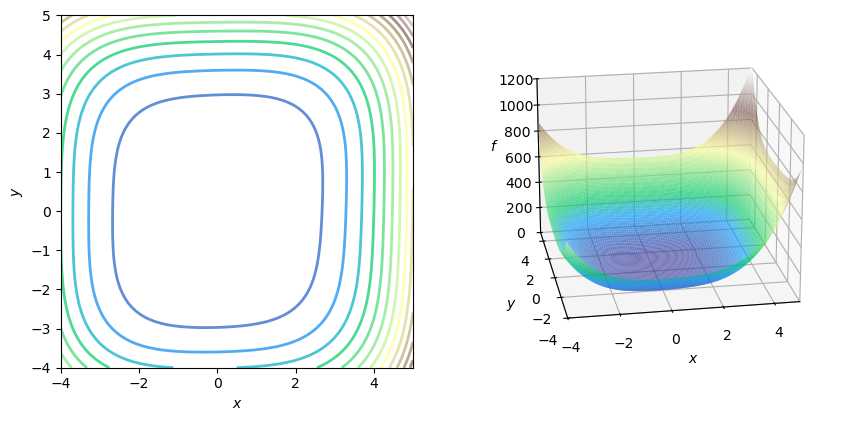

In [9]:
def plot_f_cont_and_surf(f):
    
    fig = plt.figure( figsize=(10,5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.set_facecolor('#ffffff')
    gs = GridSpec(1, 2, figure=fig)
    axc = fig.add_subplot(gs[0, 0])
    axs = fig.add_subplot(gs[0, 1],  projection='3d')
    
    x_range = [-4, 5]
    y_range = [-4, 5]
    z_range = [0, 1200]
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X,Y = np.meshgrid(x,y)
    
    cont = axc.contour(X, Y, f(X, Y), cmap='terrain', levels=18, linewidths=2, alpha=0.7)
    axc.set_xlabel('$x$')
    axc.set_ylabel('$y$')
    axc.set_xlim(*x_range)
    axc.set_ylim(*y_range)
    axc.set_aspect("equal")
    axc.autoscale(enable=False)
    
    surf = axs.plot_surface(X,Y, f(X,Y), cmap='terrain', 
                    antialiased=True,cstride=1,rstride=1, alpha=0.69)
    axs.set_xlabel('$x$')
    axs.set_ylabel('$y$')
    axs.set_zlabel('$f$')
    axs.set_xlim(*x_range)
    axs.set_ylim(*y_range)
    axs.set_zlim(*z_range)
    axs.view_init(elev=20, azim=-100)
    axs.autoscale(enable=False)
    
    return fig, axc, axs

plot_f_cont_and_surf(f_example_2)

In [10]:
def newtons_method_2(f, grad_f, hessian_f, x_y, num_iterations=100):
    for iteration in range(num_iterations):
        x_y = x_y - np.matmul(np.linalg.inv(hessian_f(x_y[0,0],x_y[1,0])),grad_f(x_y[0,0],x_y[1,0]))
        print(x_y.T)

    return x_y



In [11]:
num_iterations_example_2 = 25; x_y_initial = np.array([[4], [4]])
newtons_example_2 = newtons_method_2(f_example_2, grad_f_example_2, hessian_f_example_2, 
                                     x_y_initial, num_iterations=num_iterations_example_2)
print("Newton's method result: x_min, y_min =", newtons_example_2.T)

[[2.58273866 2.62128884]]
[[1.59225691 1.67481611]]
[[0.87058917 1.00182107]]
[[0.33519431 0.49397623]]
[[0.04123585 0.12545903]]
[[0.00019466 0.00301029]]
[[-2.48536390e-08  3.55365461e-08]]
[[ 4.15999751e-17 -2.04850948e-17]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
[[0. 0.]]
Newton's method result: x_min, y_min = [[0. 0.]]


In [12]:
def gradient_descent_2(grad_f, x_y, learning_rate=0.1, num_iterations=100):
    for iteration in range(num_iterations):
        x_y = x_y - learning_rate * grad_f(x_y[0,0], x_y[1,0])
        print(x_y.T)
    return x_y

num_iterations_2 = 300; learning_rate_2 = 0.02; x_y_initial = np.array([[4], [4]])
# num_iterations_2 = 300; learning_rate_2 = 0.03; x_y_initial = np.array([[4], [4]])
gd_example_2 = gradient_descent_2(grad_f_example_2, x_y_initial, learning_rate_2, num_iterations_2)
print("Gradient descent result: x_min, y_min =", gd_example_2) 

[[-1.552 -0.272]]
[[-1.00667816 -0.27035727]]
[[-0.76722601 -0.26354393]]
[[-0.61199381 -0.2542789 ]]
[[-0.49957833 -0.24362609]]
[[-0.41356991 -0.23220381]]
[[-0.34561558 -0.22041345]]
[[-0.29081322 -0.20852957]]
[[-0.24600097 -0.19674484]]
[[-0.20899755 -0.1851958 ]]
[[-0.17822189 -0.17397885]]
[[-0.15248504 -0.1631609 ]]
[[-0.13086798 -0.15278673]]
[[-0.11264557 -0.14288438]]
[[-0.09723686 -0.13346909]]
[[-0.08417097 -0.12454632]]
[[-0.07306297 -0.11611405]]
[[-0.0635961  -0.10816464]]
[[-0.05550841 -0.10068622]]
[[-0.04858239 -0.09366384]]
[[-0.04263691 -0.08708035]]
[[-0.03752071 -0.08091713]]
[[-0.03310722 -0.07515463]]
[[-0.02929035 -0.06977285]]
[[-0.02598099 -0.06475166]]
[[-0.02310421 -0.06007107]]
[[-0.02059686 -0.05571146]]
[[-0.01840572 -0.05165372]]
[[-0.01648577 -0.04787936]]
[[-0.01479896 -0.04437062]]
[[-0.01331303 -0.04111048]]
[[-0.01200059 -0.03808275]]
[[-0.01083835 -0.03527203]]
[[-0.0098065  -0.03266375]]
[[-0.00888809 -0.03024417]]
[[-0.00806868 -0.02800031]]
[[